In [1]:
import dca_frustratometer
import pandas as pd
import numpy as np



In [2]:
mutations = experimental_ddG={"16_A": 2.14, "18_A": 3.52, "21_S": 0.05, "25_A": 2.41, "27_V": 1.58, "29_A": 3.23, "30_S": 0.23,
                              "33_A":-0.21, "33_G": 0.10, "35_S": 0.10, "35_G":-0.31, "42_V": 0.72, "44_A": 3.66, "46_G": 0.88,
                              "47_V": 0.11, "52_G": 2.22, "53_G": 2.39, "59_V": 1.08, "65_A": 4.01, "66_A": 2.34, "68_A": 2.17,
                              "73_A": 3.07, "79_A":-0.67, "79_G": 1.21, "81_G": 1.86, "83_A": 0.82, "83_G": 1.28, "85_A": 4.20,
                              "92_A": 1.56, "94_A": 4.50, "96_A": 3.36}

structure = 'examples/data/1gm1.pdb'

awsem_model = dca_frustratometer.AWSEMFrustratometer(structure,'A')
#potts_model = dca_frustratometer.dca.pydca.run(alignment,)
#dca_model = dca_frustratometer.PottsModel.from_pottsmodel(potts_model, structure, 'A', distance_cutoff=16)

@> 1393 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [3]:
data=[]
AWSEM_native=awsem_model.native_energy() / 4.184
for mutation, experimental_energy in mutations.items():
    pos, aa = mutation.split('_')
    pos=int(pos)-9
    seq = str(awsem_model.sequence)
    new_seq = ''.join([(a if i!=pos else aa ) for i, a in enumerate(seq)])
    assert len(new_seq)==len(seq)
    assert new_seq != seq
    awsem_energy = awsem_model.native_energy(new_seq) / 4.184 #kcal/mol
    data+=[[mutation, experimental_energy, awsem_energy - AWSEM_native]]
data = pd.DataFrame(data, columns=['mutation','experimental','AWSEM'])
data



,mutation,experimental,AWSEM
0,16_A,2.14,1.315032
1,18_A,3.52,1.445230
2,21_S,0.05,0.057403
3,25_A,2.41,2.965892
4,27_V,1.58,0.677430
5,29_A,3.23,2.642152
6,30_S,0.23,0.029754
7,33_A,-0.21,0.408958
8,33_G,0.10,0.117649
9,35_S,0.10,0.062834


/tmp/ipykernel_429541/331720583.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  slope = np.linalg.lstsq(x[:,np.newaxis],y)[0][0]
/tmp/ipykernel_429541/331720583.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope = np.linalg.lstsq(x[:,np.newaxis],y)[0][0]


(-1.0, 6.0)

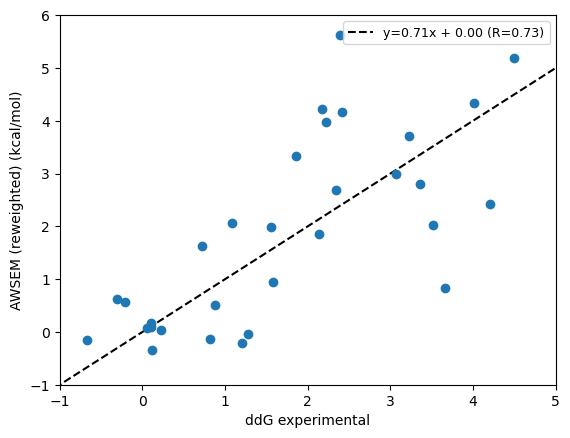

In [4]:
import matplotlib.pyplot as plt
from statistics import linear_regression
#plt.scatter(data['experimental'],data['DCA'])
x = data['experimental']
y = data['AWSEM']

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
slope = np.linalg.lstsq(x[:,np.newaxis],y)[0][0]
intercept = 0
xl=np.array([-2,8])
line = slope*xl+intercept
r_value=np.corrcoef(x,y)[0,1]
plt.plot(xl, line/slope, '--k', label='y={:.2f}x + {:.2f} (R={:.2f})'.format(slope,intercept,r_value))
plt.plot(x,y/slope, 'o') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.legend(fontsize=9)
plt.xlabel('ddG experimental')
plt.ylabel('AWSEM (reweighted) (kcal/mol)')
plt.xlim(-1, 5)
plt.ylim(-1, 6)